### 데이터 수집
    * 스크래이핑을 통한 수집
        - 뉴스
        - SNS
        - OTT
        - 댓글
    * json api를 활용
        - 핀테크 금융
        - 프롭테크 부동산
        - 마케팅
        - SCM
        - CRM
    * 빅데이터 생성
    * DB 활용
        - Sqlite
        - Mysql
    * 시각화
        - 다차원 시각화
    * 웹 커스텀
        - 개인 홈페이지
    * 사무 자동화
        - 오피스
        - RPA
    * 사회소통능력 
        - 유튜브
        - SNS
        -홈페이지 관리
### 개별 데이터 분석
    * 정형 데이터 분석: 개별분석
        - 모멘텀 분석
        - 기초 분석
    * 비정형 데이터 분석: 개별분석
        - Count Vectorize
        - TF-IDF
        - Word2Vec:cbow
        - LDA

### 데이터 융합
    * 정형데이터: 주가 데이터
    * 비정형 데이터: 뉴스 데이터
    * 데이터 융합
        - 데이터베이스 융합: DB/SQL join
        - Pandas 활용: Merge 명령어 사용
### 고급 데이터 처리 기법
*  해당분야 용어 기법
* 

In [1]:
### 기초데이터: DB join 방식 활용
### count 벡터화: Pandas 활용
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup as bsp
import matplotlib as mpl
import matplotlib.pyplot as plt
import sqlite3

In [2]:
dbname='./navernews.db'
def getDB(sql='select nidx,ndate from nnews where nday is NULL'):
    with sqlite3.connect(dbname) as conn:
        cur=conn.cursor()
        #sql='select * from stockp where skey>20200101 order by skey asc'
        qry=cur.execute(sql)
        desc=[row[0] for row in qry.description]
        data=qry.fetchall()
    return((desc,data))

In [3]:
def dbNday(ndays):
    with sqlite3.connect(dbname) as conn:
        cur=conn.cursor()
        #sql='select * from stockp where skey>20200101 order by skey asc'
        sql='update  nnews set nday="'+ndays[1]+'" where nidx = '+str(ndays[0])
        qry=cur.execute(sql)
    return(qry)

In [4]:
def updateNdays():
    res=getDB()
    ndays=[]
    for r in res[1]:
        ndays.append((r[0],r[1][:10]))
    for n in ndays:
        print(dbNday(n))

In [5]:
updateNdays()

In [6]:
sql= "select sday,sopen,shigh,slow,sclose,svol,count(nidx) nd,group_concat(ntitle) gtitle from stockp a left outer join nnews b on a.sday=b.nday group by sday"
mdata=getDB(sql)

In [7]:
df=pd.DataFrame(data=mdata[1],columns=mdata[0])
df.tail()

,sday,sopen,shigh,slow,sclose,svol,nd,gtitle
885,2021-03-30,276500,279500,276000,279000,41692,0,None
886,2021-03-31,279000,281500,276500,281000,58150,0,None
887,2021-04-01,282500,283000,277500,279000,72605,0,None
888,2021-04-02,278000,278500,272000,274000,119686,0,None
889,2021-04-05,275000,277500,274000,276000,17034,0,None


In [8]:
nlpdf=df[['sday','gtitle']].copy()
nf=nlpdf.fillna('')
nf.head()

,sday,gtitle
0,2017-08-17,
1,2017-08-18,
2,2017-08-21,
3,2017-08-22,
4,2017-08-23,


In [9]:
from konlpy.tag import Kkma
kkma=Kkma()

def dictsort(r):
    sr=sorted(r.items(),key=(lambda x:x[1]),reverse=True)
    return r

def getPOS(rres,limlen=0):
    p=kkma.pos(rres)
    dictpos={}
    words=[]
    #표제어 추출
    check=['NNG','NNP','NNB','NNM','VV','VA','VXV','VXA','VCP','VCN','SF','EFN','EFQ']
    for  w,pos in p:
        if(pos in check):
            if(len(w)>limlen):
                words.append(w)
                if (w in dictpos.keys()):
                    dictpos[w]+=1
                else:
                    dictpos[w]=1
    return (dictpos,words)  

In [10]:
gtitles=nf.values
gtitles[-200:-195]

array([['2020-06-15', ''],
       ['2020-06-16', ''],
       ['2020-06-17',
        ' 포토  신세계  푸빌라 캐릭터 상품, 포토  신세계 푸빌라 비치백  비치타올, 포토  신세계백  푸빌라 캐릭터 상품 선보여  , 포토  신세계백화점  푸빌라 캐릭터'],
       ['2020-06-18', '신세계百  휴가철 앞두고 대형  와인 장터  연다'],
       ['2020-06-19',
        '신세계 이어 신라免도 재고품 온라인서 판다,재고 면세품 반값에 풀린다   신세계 신라 롯데 다음주 판매 종합 ']],
      dtype=object)

In [11]:
corpus=[]
for g in gtitles:
    res=getPOS(g[1],1)
    corpus.append(' '.join(res[1]))

In [12]:

# 카운트 기반 TDM
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer(min_df=2)
tdm=vect.fit_transform(corpus).toarray()
tdm.shape

(890, 1998)

In [13]:
## 융합형 자료에서는 단위가 달라서 사전 스케일링이 필요
from sklearn.preprocessing import MinMaxScaler
mxs=MinMaxScaler()
mxtdm=mxs.fit(tdm)
mxtdm=mxs.transform(tdm)
mxtdm.shape

(890, 1998)

In [14]:
### 주피터에서 리스트 축약없이 전체 보기
import sys
import numpy
#numpy.set_printoptions(threshold=sys.maxsize)
mxtdm[-197]

array([0., 0., 0., ..., 0., 0., 0.])

In [15]:
cols=vect.get_feature_names()
cols.insert(0,'date')
cols

['date',
 'ㄴ다',
 'ㄹ까',
 'ㄹ래',
 'ㅂ니다',
 '가격',
 '가공',
 '가구',
 '가나',
 '가능',
 '가능성',
 '가닥',
 '가도',
 '가동',
 '가드',
 '가란',
 '가르',
 '가방',
 '가성',
 '가세',
 '가속',
 '가속화',
 '가시화',
 '가을',
 '가입',
 '가입금',
 '가전',
 '가정',
 '가족',
 '가지',
 '가짜',
 '가치',
 '가칭',
 '각축전',
 '간식',
 '간판',
 '간편',
 '갈리',
 '갈이',
 '감각',
 '감독',
 '감면',
 '감성',
 '감소',
 '감안',
 '감자',
 '강남',
 '강등',
 '강릉',
 '강세',
 '강원',
 '강원도',
 '강의',
 '강자',
 '강정',
 '강좌',
 '강화',
 '갖추',
 '개관',
 '개념',
 '개막',
 '개막전',
 '개명',
 '개발',
 '개봉',
 '개선',
 '개설',
 '개시',
 '개원',
 '개월',
 '개장',
 '개점',
 '개최',
 '개편',
 '객실',
 '갤러리',
 '갱신',
 '거래액',
 '거론',
 '거리',
 '거침없',
 '거포',
 '걱정',
 '건강',
 '건립',
 '건물',
 '건설',
 '걸음',
 '검사',
 '검토',
 '게시판',
 '게임',
 '겨냥',
 '겨울',
 '격돌',
 '격변기',
 '견인',
 '결과',
 '결국',
 '결단',
 '결별',
 '결산',
 '결실',
 '결정',
 '결제',
 '결합',
 '경기',
 '경기장',
 '경복궁',
 '경북',
 '경영',
 '경영난',
 '경쟁',
 '경쟁력',
 '경제',
 '경험',
 '계단',
 '계속',
 '계승',
 '계약',
 '계열',
 '계열사',
 '계절',
 '계층',
 '계획',
 '고가',
 '고객',
 '고공',
 '고급',
 '고기',
 '고난',
 '고려',
 '고르',
 '고민',
 '고성',
 '고속',
 '고용',
 '고전',
 '고창',
 '고향',


In [16]:
gtitles.shape

(890, 2)

In [17]:
tdm[-200:-195]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [18]:
tdms=[]
for i,t in enumerate(mxtdm):
    res=list(t)
    res.insert(0,gtitles[i][0])
    tdms.append(res)

In [19]:
tdmdf=pd.DataFrame(data=tdms, columns=cols)
stdmdf=tdmdf.set_index('date')
stdmdf.head()

,ㄴ다,ㄹ까,ㄹ래,ㅂ니다,가격,가공,가구,가나,가능,가능성,...,흐름,흑자,흔들,흥행,희망,희비,희석,히트,힘들,힘주
date,,,,,,,,,,,,,,,,,,,,,
2017-08-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
sdf=df.set_index('sday').drop(['gtitle'],axis=1)
mxs=MinMaxScaler()
mxs.fit(sdf)
outv=mxs.transform(sdf)
msdf=pd.DataFrame(outv,index=sdf.index,columns=sdf.columns)

print('max:',np.max(mxs.data_max_),'min:',np.min(mxs.data_min_),'n:',mxs.n_samples_seen_)

max: 659870.0 min: 0.0 n: 890


In [ ]:
msdf.head()

In [21]:
### 비정형데이터와 정형 데이터의 융합
mergedf=pd.merge(msdf,stdmdf,left_index=True,right_index=True)
mergedf.head()

,sopen,shigh,slow,sclose,svol,nd,ㄴ다,ㄹ까,ㄹ래,ㅂ니다,...,흐름,흑자,흔들,흥행,희망,희비,희석,히트,힘들,힘주
sday,,,,,,,,,,,,,,,,,,,,,
2017-08-17,0.061224,0.058120,0.069288,0.066434,0.059732,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-18,0.054422,0.063248,0.071161,0.064685,0.055110,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-21,0.061224,0.058120,0.052434,0.047203,0.086167,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-22,0.042517,0.046154,0.059925,0.059441,0.039561,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-23,0.045918,0.042735,0.056180,0.052448,0.051856,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
mergedf['target']=mergedf['sclose'].shift(-1)
mergedf.head()

,sopen,shigh,slow,sclose,svol,nd,ㄴ다,ㄹ까,ㄹ래,ㅂ니다,...,흑자,흔들,흥행,희망,희비,희석,히트,힘들,힘주,target
sday,,,,,,,,,,,,,,,,,,,,,
2017-08-17,0.061224,0.058120,0.069288,0.066434,0.059732,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.064685
2017-08-18,0.054422,0.063248,0.071161,0.064685,0.055110,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.047203
2017-08-21,0.061224,0.058120,0.052434,0.047203,0.086167,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.059441
2017-08-22,0.042517,0.046154,0.059925,0.059441,0.039561,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.052448
2017-08-23,0.045918,0.042735,0.056180,0.052448,0.051856,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.055944


In [23]:
Xori=mergedf.iloc[:,:2004].values
Xori.shape

(890, 2004)

In [24]:
Yori=mergedf.fillna(0).iloc[:,2004].values
Yori

array([0.06468531, 0.0472028 , 0.05944056, 0.05244755, 0.05594406,
       0.0541958 , 0.06118881, 0.0541958 , 0.0506993 , 0.0472028 ,
       0.02797203, 0.02447552, 0.02622378, 0.00874126, 0.01223776,
       0.0034965 , 0.02272727, 0.01923077, 0.01048951, 0.00174825,
       0.02972028, 0.02972028, 0.02972028, 0.01573427, 0.00874126,
       0.00874126, 0.        , 0.03146853, 0.01398601, 0.04020979,
       0.0541958 , 0.04370629, 0.02622378, 0.02972028, 0.06643357,
       0.11363636, 0.10839161, 0.1013986 , 0.10664336, 0.11013986,
       0.12937063, 0.12062937, 0.12237762, 0.16083916, 0.15909091,
       0.18706294, 0.17307692, 0.1486014 , 0.15734266, 0.16958042,
       0.16783217, 0.23426573, 0.28146853, 0.25699301, 0.24475524,
       0.23251748, 0.25524476, 0.25      , 0.24825175, 0.27797203,
       0.33566434, 0.31293706, 0.32167832, 0.29020979, 0.29370629,
       0.33741259, 0.34265734, 0.34265734, 0.37587413, 0.36713287,
       0.38636364, 0.4020979 , 0.37587413, 0.3548951 , 0.35664

In [25]:
### 윈도우 처리
tot=len(Xori)
winsize=5
X_data=[]
Y_data=[]
for i in range(tot-winsize):
    X_data.append(Xori[i:winsize+i])
    Y_data.append(Xori[winsize+i][3])
    #Y_data.append(Yori[winsize-1+i])
x_data=numpy.array(X_data).astype('float32')
y_data=numpy.array(Y_data).astype('float32')

In [26]:
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,LSTM,Conv2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


In [27]:
x_data.shape

(885, 5, 2004)

In [32]:
x_data[0]

array([[0.06122449, 0.05811966, 0.06928839, ..., 0.        , 0.        ,
        0.        ],
       [0.05442177, 0.06324787, 0.07116105, ..., 0.        , 0.        ,
        0.        ],
       [0.06122449, 0.05811966, 0.05243446, ..., 0.        , 0.        ,
        0.        ],
       [0.04251701, 0.04615385, 0.05992509, ..., 0.        , 0.        ,
        0.        ],
       [0.04591837, 0.04273504, 0.05617978, ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [28]:
model=Sequential()
model.add(LSTM(128,input_shape=(winsize,2004,)))
model.add(Dense(64,activation ="linear"))
model.add(Dense(1,activation="linear"))
model.compile(optimizer="sgd",loss="mse",metrics=['cosine_proximity'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               1092096   
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 1,100,417
Trainable params: 1,100,417
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.fit(x_data,y_data,epochs=10)

Epoch 1/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0598 - cosine_proximity: 0.8881
Epoch 2/10
28/28 [==============================] - 1s 21ms/step - loss: 0.0256 - cosine_proximity: 0.9989
Epoch 3/10
28/28 [==============================] - 1s 21ms/step - loss: 0.0201 - cosine_proximity: 0.9989
Epoch 4/10
28/28 [==============================] - 1s 21ms/step - loss: 0.0159 - cosine_proximity: 0.9989
Epoch 5/10
28/28 [==============================] - 1s 21ms/step - loss: 0.0126 - cosine_proximity: 0.9989
Epoch 6/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0101 - cosine_proximity: 0.9989
Epoch 7/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0081 - cosine_proximity: 0.9989
Epoch 8/10
28/28 [==============================] - 1s 25ms/step - loss: 0.0066 - cosine_proximity: 0.9989
Epoch 9/10
28/28 [==============================] - 1s 40ms/step - loss: 0.0055 - cosine_proximity: 0.9989
Epoch 10/10
28/28 [==================

In [33]:
predict.shape

(885, 1)

In [36]:
closep=mergedf['sclose'].values[5:]
closep.shape


(885,)

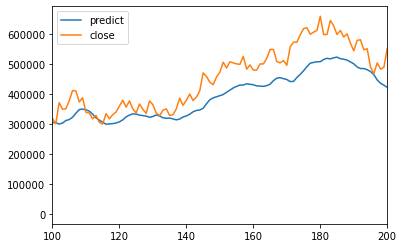

In [52]:
max=659870
predict=model.predict(x_data)*max
closep=mergedf['sclose'].values[5:]*max

plt.plot(predict ,label='predict')
plt.plot(closep,label='close')
plt.legend()
plt.xlim(100,200)
#plt.ylim(0.4,1.0)
plt.show()

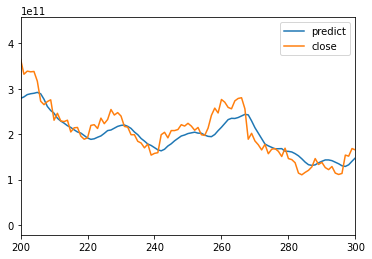

In [55]:
max=659870
min=0
# 원래 가격으로 돌려 놓기
#inv_predict=mxs.inverse_transform(predict)
#inv_closep=mxs.inverse_transform(closep)
inv_predict=predict*(max-min)+min
inv_closep=closep*(max-min)+min

plt.plot(inv_predict ,label='predict')
plt.plot(inv_closep,label='close')
plt.legend()
plt.xlim(200,300)
#plt.ylim(0.2,0.9)
plt.show()

In [61]:
msdf.drop('nd',axis=1)
Xori=msdf.values
Xori[:5]

array([[0.06122449, 0.05811966, 0.06928839, 0.06643357, 0.05973219,
        0.        ],
       [0.05442177, 0.06324786, 0.07116105, 0.06468531, 0.05511048,
        0.        ],
       [0.06122449, 0.05811966, 0.05243446, 0.0472028 , 0.08616661,
        0.        ],
       [0.04251701, 0.04615385, 0.05992509, 0.05944056, 0.03956063,
        0.        ],
       [0.04591837, 0.04273504, 0.05617978, 0.05244755, 0.05185615,
        0.        ]])

In [62]:
tot=len(Xori)
winsize=5
X_data=[]
Y_data=[]
for i in range(tot-winsize):
    X_data.append(Xori[i:winsize+i])
    Y_data.append(Xori[winsize+i][3])
    #Y_data.append(Yori[winsize-1+i])
x_data=numpy.array(X_data).astype('float32')
y_data=numpy.array(Y_data).astype('float32')

In [64]:
print(x_data.shape,y_data.shape)


(885, 5, 6) (885,)


In [65]:
model=Sequential()
model.add(LSTM(128,input_shape=(winsize,6,)))
model.add(Dense(64,activation ="linear"))
model.add(Dense(1,activation="linear"))
model.compile(optimizer="sgd",loss="mse",metrics=['cosine_proximity'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128)               69120     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 77,441
Trainable params: 77,441
Non-trainable params: 0
_________________________________________________________________


In [66]:
model.fit(x_data,y_data,epochs=10)

Epoch 1/10
28/28 [==============================] - 0s 5ms/step - loss: 0.0390 - cosine_proximity: 0.9243
Epoch 2/10
28/28 [==============================] - 0s 5ms/step - loss: 0.0135 - cosine_proximity: 0.9989
Epoch 3/10
28/28 [==============================] - 0s 5ms/step - loss: 0.0095 - cosine_proximity: 0.9989
Epoch 4/10
28/28 [==============================] - 0s 6ms/step - loss: 0.0069 - cosine_proximity: 0.9989
Epoch 5/10
28/28 [==============================] - 0s 5ms/step - loss: 0.0051 - cosine_proximity: 0.9989
Epoch 6/10
28/28 [==============================] - 0s 5ms/step - loss: 0.0039 - cosine_proximity: 0.9989
Epoch 7/10
28/28 [==============================] - 0s 5ms/step - loss: 0.0031 - cosine_proximity: 0.9989
Epoch 8/10
28/28 [==============================] - 0s 5ms/step - loss: 0.0025 - cosine_proximity: 0.9989
Epoch 9/10
28/28 [==============================] - 0s 5ms/step - loss: 0.0022 - cosine_proximity: 0.9989
Epoch 10/10
28/28 [===========================

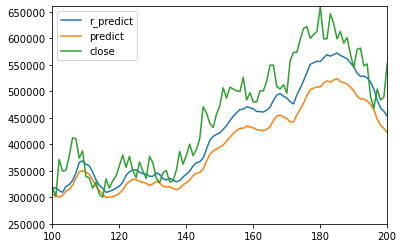

In [68]:
max=659870
r_predict=model.predict(x_data)*max
closep=mergedf['sclose'].values[5:]*max

plt.plot(r_predict ,label='r_predict')
plt.plot(predict ,label='predict')
plt.plot(closep,label='close')
plt.legend()
plt.xlim(100,200)
plt.ylim(250000,660000)
plt.show()
#predict : 뉴스 크롤링을 통해 주가 예측
#r_predict : 주가의 변화를 통해 다음 주가 예측
#close : 종가

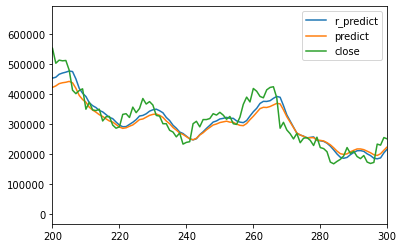

In [69]:
plt.plot(r_predict ,label='r_predict')
plt.plot(predict ,label='predict')
plt.plot(closep,label='close')
plt.legend()
plt.xlim(200,300)
#plt.ylim(250000,660000)
plt.show()
